# Confidence intervals

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt

confidence_level = 0.95

# print as csv
bakery_sales_full_data = pd.read_pickle('../exported_data/bakery_sales_full_data.pkl')

In [41]:
print(bakery_sales_full_data)

          Datum  Warengruppe      Umsatz  Bewoelkung  Temperatur  \
0    2013-07-01          1.0  148.828353         6.0     17.8375   
1    2013-07-01          2.0  535.856285         6.0     17.8375   
2    2013-07-01          3.0  201.198426         6.0     17.8375   
3    2013-07-01          4.0   65.890169         6.0     17.8375   
4    2013-07-01          5.0  317.475875         6.0     17.8375   
...         ...          ...         ...         ...         ...   
9733 2019-07-28          NaN         NaN         3.0     23.3500   
9734 2019-07-29          NaN         NaN         6.0     25.2500   
9735 2019-07-30          NaN         NaN         7.0     20.7375   
9736 2019-07-31          NaN         NaN         6.0     20.4500   
9737 2019-08-01          NaN         NaN         5.0     21.0625   

      Windgeschwindigkeit  Wettercode Jahr_Monat  monthly_mean_temp  \
0                    15.0        20.0    2013-07          21.901210   
1                    15.0        20.0    

## Rainday

Mean: 0.4342780858492504, SE: 0.005023112136988193, CI Lower: 0.4244317430163947, CI Upper: 0.44412442868210605


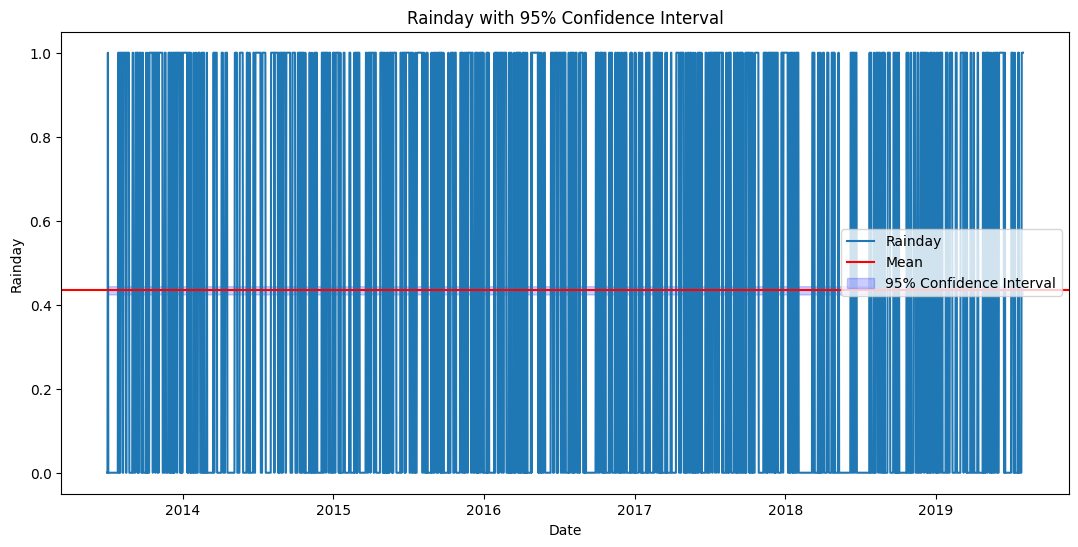

In [4]:
mean = np.mean(bakery_sales_full_data['rainday'])
se = np.std(bakery_sales_full_data['rainday'], ddof=1) / np.sqrt(len(bakery_sales_full_data))

# Verwenden von DescrStatsW zur Berechnung des Konfidenzintervalls
d_stats = sms.DescrStatsW(bakery_sales_full_data['rainday'])
ci_lower, ci_upper = d_stats.tconfint_mean(alpha=1-confidence_level)


print(f"Mean: {mean}, SE: {se}, CI Lower: {ci_lower}, CI Upper: {ci_upper}")

# Visualisierung
plt.figure(figsize=(13, 6))
plt.plot(bakery_sales_full_data['Datum'], bakery_sales_full_data['rainday'], label='Rainday')
plt.axhline(y=mean, color='r', linestyle='-', label='Mean')
plt.fill_between(bakery_sales_full_data['Datum'], ci_lower, ci_upper, color='b', alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Rainday')
plt.title('Rainday with 95% Confidence Interval')
plt.legend()
plt.show()

## Schulferien

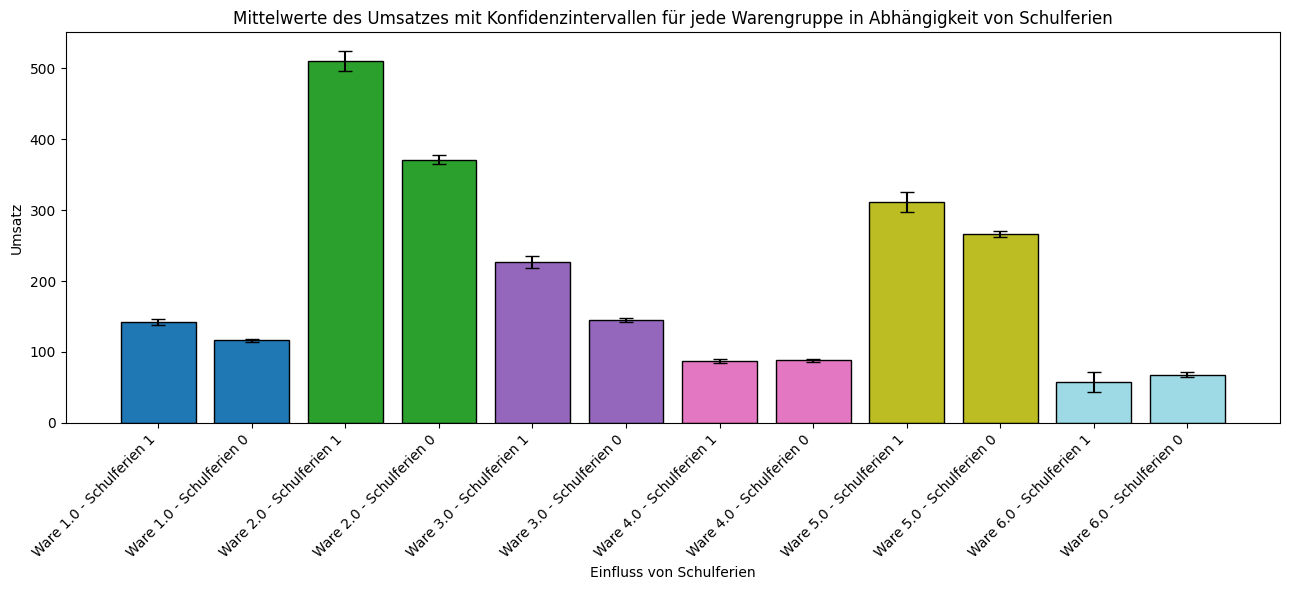

In [5]:
# Verwendung von vollständigen Datenpaaren
bakery_sales_full_data_oNA = bakery_sales_full_data.dropna(subset=['Warengruppe', 'Umsatz', 'BinSchhol'])

# EExtrahieren der Gruppen (Warengruppe-Schulferien)
warengruppen = bakery_sales_full_data_oNA['Warengruppe'].unique()
BinSchhols = bakery_sales_full_data_oNA['BinSchhol'].unique()

# Definition der Farbskala
colors = plt.get_cmap('tab20', len(warengruppen))

# Leere Listen zum Speichern der Einzelergebnisse und Properties
means = []
ci_lowers = []
ci_uppers = []
labels = []
bar_colors = []

# Berechnung der Mittelwerte und Konfidenzintervalle für jede Kombination (Warengruppe-Schulferien)
for i, warengruppe in enumerate(warengruppen):
    for BinSchhol in BinSchhols:
        group_data = bakery_sales_full_data_oNA[
            (bakery_sales_full_data_oNA['Warengruppe'] == warengruppe) &
            (bakery_sales_full_data_oNA['BinSchhol'] == BinSchhol)
        ]['Umsatz']
        
        if len(group_data) > 0:
            mean = np.mean(group_data)
            means.append(mean)
                        
            d_stats = sms.DescrStatsW(group_data)
            ci_lower, ci_upper = d_stats.tconfint_mean(alpha=0.05)
            ci_lowers.append(mean - ci_lower)
            ci_uppers.append(ci_upper - mean)
            
            labels.append(f'Ware {warengruppe} - Schulferien {BinSchhol}')
            bar_colors.append(colors(i))

# Umformen der Konfidenzintervalle für die Fehlerbalken
yerr = np.array([ci_lowers, ci_uppers])

# Erstellen des Balkendiagramms
plt.figure(figsize=(13, 6))
bars = plt.bar(labels, means, yerr=yerr, capsize=5, color=bar_colors, edgecolor='black')
plt.xlabel('Einfluss von Schulferien')
plt.ylabel('Umsatz')
plt.title('Mittelwerte des Umsatzes mit Konfidenzintervallen für jede Warengruppe in Abhängigkeit von Schulferien')
plt.xticks(rotation=45, ha='right')
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

## Balkendiagramm mit Konfidenzintervall für den Umsatz der Warengruppe in Abhängigkeit der Feiertage

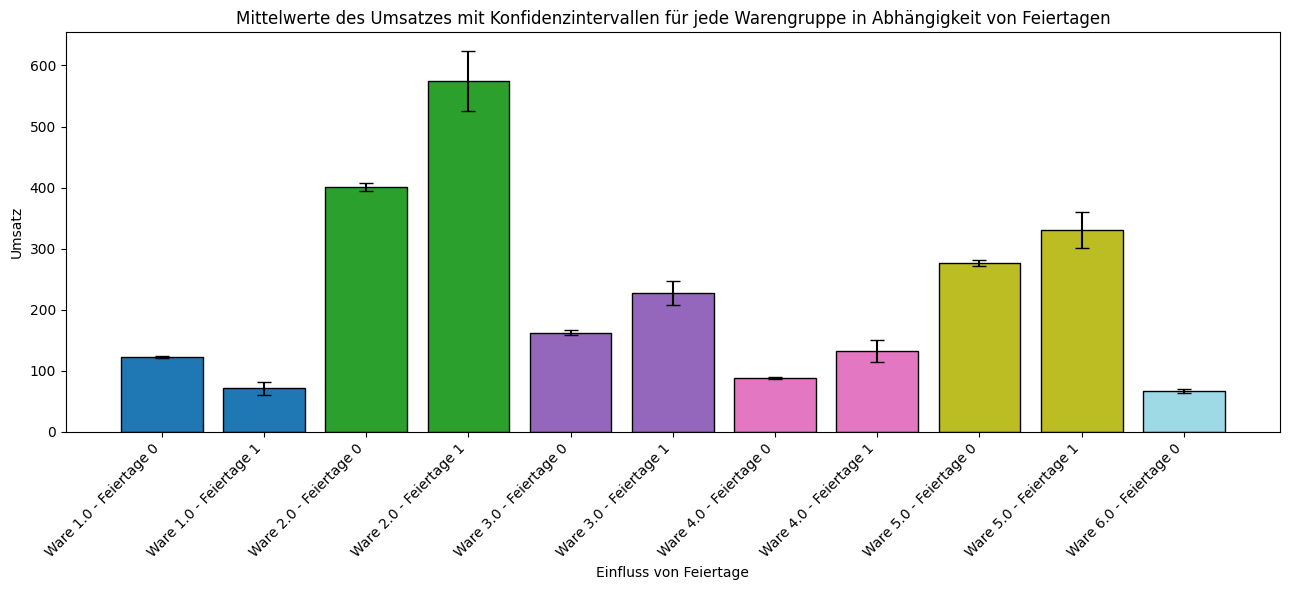

In [6]:
# Verwendung von vollständigen Datenpaaren
bakery_sales_full_data_oNA = bakery_sales_full_data.dropna(subset=['Warengruppe', 'Umsatz', 'BinHoly'])

# Extrahieren der Gruppen (Warengruppe-Feiertage)
warengruppen = bakery_sales_full_data_oNA['Warengruppe'].unique()
BinHolys = bakery_sales_full_data_oNA['BinHoly'].unique()

# Definition der Farbskala
colors = plt.get_cmap('tab20', len(warengruppen))

# Leere Listen zum Speichern der Einzelergebnisse und Properties
means = []
ci_lowers = []
ci_uppers = []
labels = []
bar_colors = []

# Berechnung der Mittelwerte und Konfidenzintervalle für jede Kombination (Warengruppe-Feiertage)
for i, warengruppe in enumerate(warengruppen):
    for BinHoly in BinHolys:
        group_data = bakery_sales_full_data_oNA[
            (bakery_sales_full_data_oNA['Warengruppe'] == warengruppe) &
            (bakery_sales_full_data_oNA['BinHoly'] == BinHoly)
        ]['Umsatz']
        
        if len(group_data) > 0:
            mean = np.mean(group_data)
            means.append(mean)
                        
            d_stats = sms.DescrStatsW(group_data)
            ci_lower, ci_upper = d_stats.tconfint_mean(alpha=0.05)
            ci_lowers.append(mean - ci_lower)
            ci_uppers.append(ci_upper - mean)
            
            labels.append(f'Ware {warengruppe} - Feiertage {BinHoly}')
            bar_colors.append(colors(i))

# Umformen der Konfidenzintervalle für die Fehlerbalken
yerr = np.array([ci_lowers, ci_uppers])

# Erstellen des Balkendiagramms
plt.figure(figsize=(13, 6))
bars = plt.bar(labels, means, yerr=yerr, capsize=5, color=bar_colors, edgecolor='black')
plt.xlabel('Einfluss von Feiertage')
plt.ylabel('Umsatz')
plt.title('Mittelwerte des Umsatzes mit Konfidenzintervallen für jede Warengruppe in Abhängigkeit von Feiertagen')
plt.xticks(rotation=45, ha='right')
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

## Balkendiagramm und Konfidenzintervall für die Variable Regentage

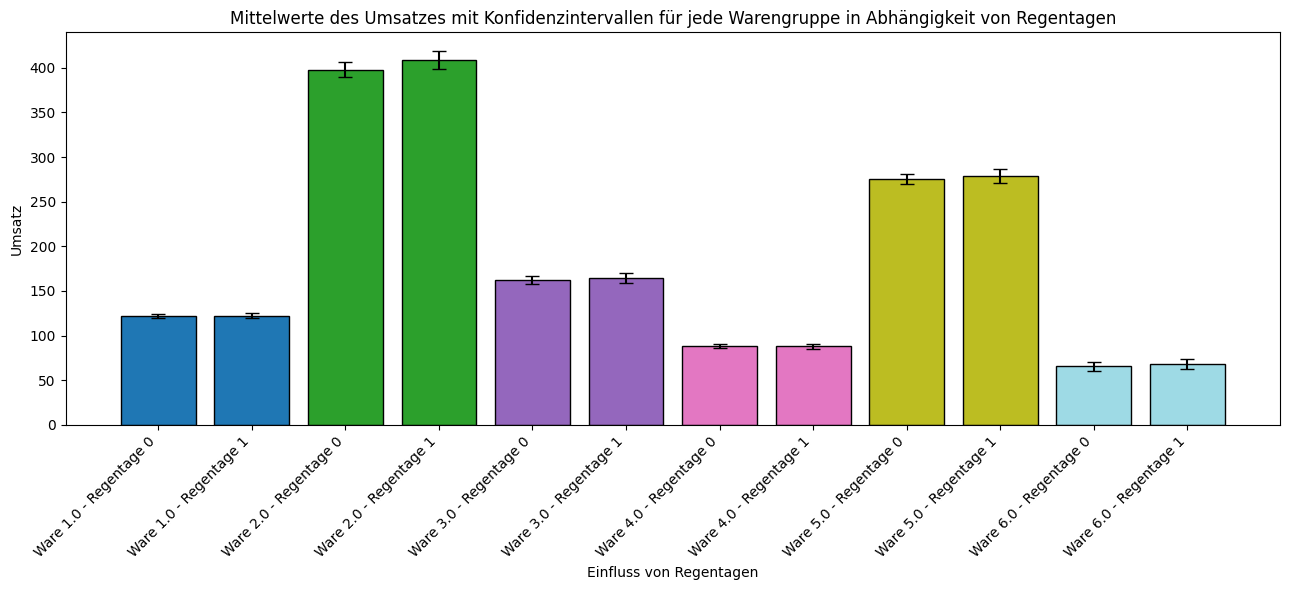

In [7]:
# Verwendung von vollständigen Datenpaaren
bakery_sales_full_data_oNA = bakery_sales_full_data.dropna(subset=['Warengruppe', 'Umsatz', 'rainday'])

# EExtrahieren der Gruppen (Warengruppe-Regentage)
warengruppen = bakery_sales_full_data_oNA['Warengruppe'].unique()
raindays = bakery_sales_full_data_oNA['rainday'].unique()

# Definition der Farbskala
colors = plt.get_cmap('tab20', len(warengruppen))

# Leere Listen zum Speichern der Einzelergebnisse und Properties
means = []
ci_lowers = []
ci_uppers = []
labels = []
bar_colors = []

# Berechnung der Mittelwerte und Konfidenzintervalle für jede Kombination (Warengruppe-Regentage)
for i, warengruppe in enumerate(warengruppen):
    for rainday in raindays:
        group_data = bakery_sales_full_data_oNA[
            (bakery_sales_full_data_oNA['Warengruppe'] == warengruppe) &
            (bakery_sales_full_data_oNA['rainday'] == rainday)
        ]['Umsatz']
        
        if len(group_data) > 0:
            mean = np.mean(group_data)
            means.append(mean)
            
            d_stats = sms.DescrStatsW(group_data)
            ci_lower, ci_upper = d_stats.tconfint_mean(alpha=0.05)
            ci_lowers.append(mean - ci_lower)
            ci_uppers.append(ci_upper - mean)
            
            labels.append(f'Ware {warengruppe} - Regentage {rainday}')
            bar_colors.append(colors(i))

# Umformen der Konfidenzintervalle für die Fehlerbalken
yerr = np.array([ci_lowers, ci_uppers])

# Erstellen des Balkendiagramms
plt.figure(figsize=(13, 6))
bars = plt.bar(labels, means, yerr=yerr, capsize=5, color=bar_colors, edgecolor='black')
plt.xlabel('Einfluss von Regentagen')
plt.ylabel('Umsatz')
plt.title('Mittelwerte des Umsatzes mit Konfidenzintervallen für jede Warengruppe in Abhängigkeit von Regentagen')
plt.xticks(rotation=45, ha='right')
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

## Balkendiagramm mit Konfidenzintervall für das Wochenende

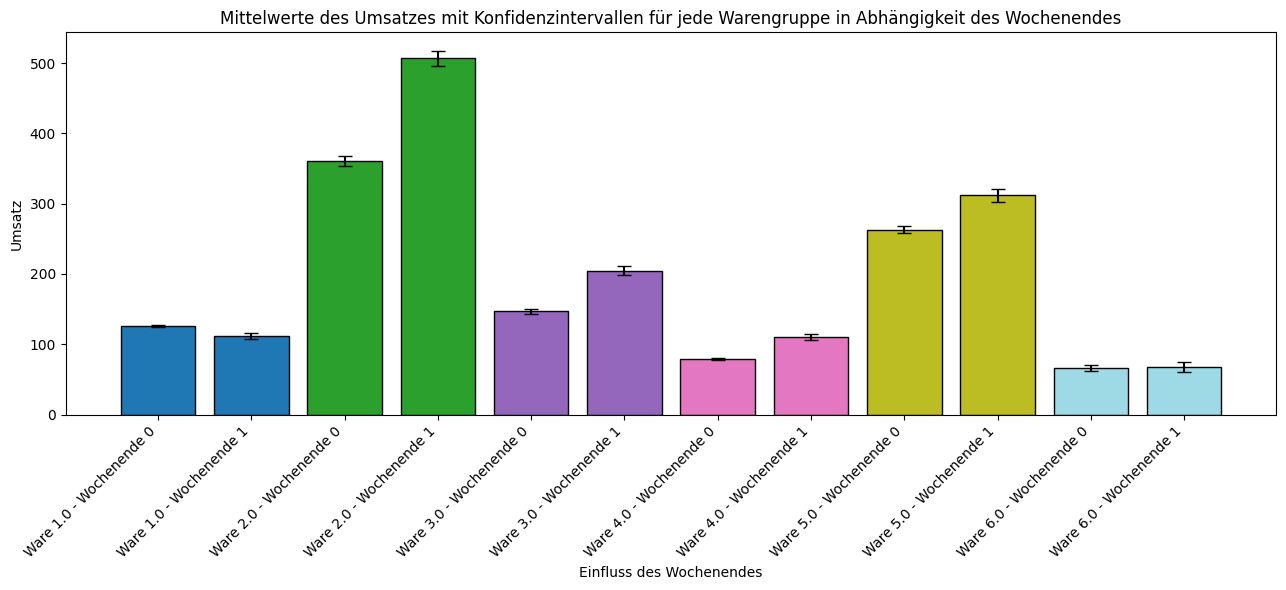

In [8]:
# Verwendung von vollständigen Datenpaaren
bakery_sales_full_data_oNA = bakery_sales_full_data.dropna(subset=['Warengruppe', 'Umsatz', 'weekend'])

# Extrahieren der Gruppen (Warengruppe-Wochenende)
warengruppen = bakery_sales_full_data_oNA['Warengruppe'].unique()
weekends = bakery_sales_full_data_oNA['weekend'].unique()

# Definition der Farbskala
colors = plt.get_cmap('tab20', len(warengruppen))

# Leere Listen zum Speichern der Einzelergebnisse und Properties
means = []
ci_lowers = []
ci_uppers = []
labels = []
bar_colors = []

# Berechnung der Mittelwerte und Konfidenzintervalle für jede Kombination (Warengruppe-Wochenende)
for i, warengruppe in enumerate(warengruppen):
    for weekend in weekends:
        group_data = bakery_sales_full_data_oNA[
            (bakery_sales_full_data_oNA['Warengruppe'] == warengruppe) &
            (bakery_sales_full_data_oNA['weekend'] == weekend)
        ]['Umsatz']
        
        if len(group_data) > 0:
            mean = np.mean(group_data)
            means.append(mean)
            
            d_stats = sms.DescrStatsW(group_data)
            ci_lower, ci_upper = d_stats.tconfint_mean(alpha=0.05)
            ci_lowers.append(mean - ci_lower)
            ci_uppers.append(ci_upper - mean)
            
            labels.append(f'Ware {warengruppe} - Wochenende {weekend}')
            bar_colors.append(colors(i))

# Umformen der Konfidenzintervalle für die Fehlerbalken
yerr = np.array([ci_lowers, ci_uppers])

# Erstellen des Balkendiagramms
plt.figure(figsize=(13, 6))
bars = plt.bar(labels, means, yerr=yerr, capsize=5, color=bar_colors, edgecolor='black')
plt.xlabel('Einfluss des Wochenendes')
plt.ylabel('Umsatz')
plt.title('Mittelwerte des Umsatzes mit Konfidenzintervallen für jede Warengruppe in Abhängigkeit des Wochenendes')
plt.xticks(rotation=45, ha='right')
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()


## Monthly mean temp diff

Mean: 0.0074481670884706955, SE: 0.031034404467186614, CI Lower: -0.05338570993117436, CI Upper: 0.06828204410811584


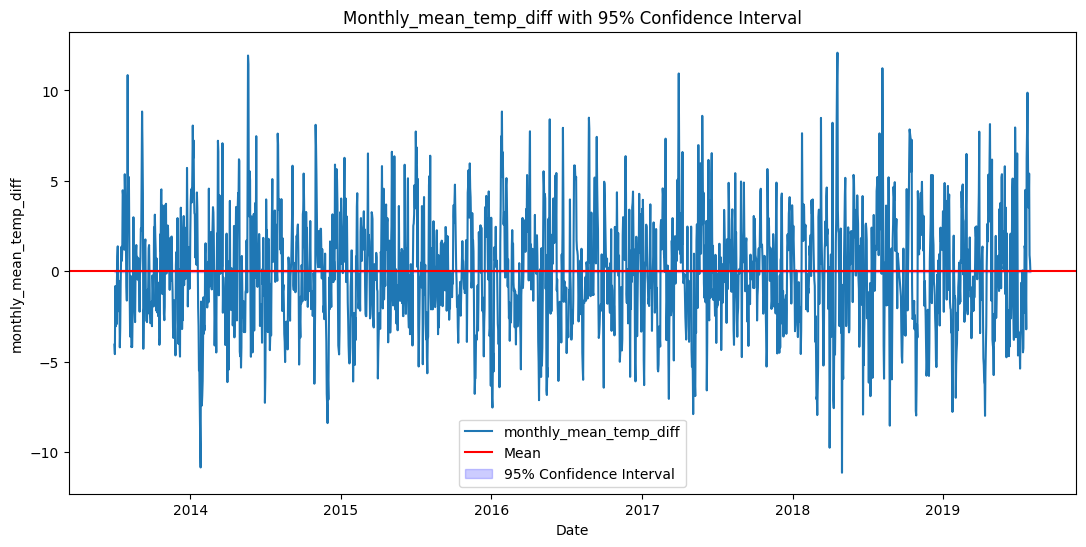

In [4]:
mean = np.mean(bakery_sales_full_data['monthly_mean_temp_diff'])
se = np.std(bakery_sales_full_data['monthly_mean_temp_diff'], ddof=1) / np.sqrt(len(bakery_sales_full_data))

# Verwenden von DescrStatsW zur Berechnung des Konfidenzintervalls
d_stats = sms.DescrStatsW(bakery_sales_full_data['monthly_mean_temp_diff'])
ci_lower, ci_upper = d_stats.tconfint_mean(alpha=1-confidence_level)


print(f"Mean: {mean}, SE: {se}, CI Lower: {ci_lower}, CI Upper: {ci_upper}")

# Visualisierung
plt.figure(figsize=(13, 6))
plt.plot(bakery_sales_full_data['Datum'], bakery_sales_full_data['monthly_mean_temp_diff'], label='monthly_mean_temp_diff')
plt.axhline(y=mean, color='r', linestyle='-', label='Mean')
plt.fill_between(bakery_sales_full_data['Datum'], ci_lower, ci_upper, color='b', alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Date')
plt.ylabel('monthly_mean_temp_diff')
plt.title('Monthly_mean_temp_diff with 95% Confidence Interval')
plt.legend()
plt.show()